In [ ]:
from torch.utils.data import Dataset

import pandas as pd
import torch

In [ ]:
class Dataset(Dataset):
    def __init__(self, path):
        self.loader = pd.read_csv(path, encoding='ISO-8859-1')
    
    def __len__(self):
        return len(self.loader)
    
    def __getitem__(self):
        return self.loader

In [ ]:
from collections import Counter

import matplotlib.pyplot as plt

In [79]:
root = '/content/drive/MyDrive/Program/Python/ML DL/Datasets/US  E-commerce records 2020.csv'
load_data = Dataset(root)

load_data.__getitem__()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


In [21]:
counter_category = Counter(load_data.__getitem__()['Category'])
most_common_category = counter_category.most_common()
most_common_category = pd.DataFrame(most_common_category)
most_common_category.columns = ['category', 'counts']
most_common_category

,category,counts
0,Office Supplies,2002
1,Furniture,686
2,Technology,624


([<matplotlib.patches.Wedge at 0x7facc3e4f990>,
 [Text(-0.38680498223177373, 1.135949781337484, 'Office Supplies'),
  Text(-0.29974879169743684, -1.1102480181814904, 'Furniture'),
  Text(0.9543680261609988, -0.6416242441192189, 'Technology')],
 [Text(-0.22563623963520132, 0.6626373724468655, '60.4%'),
  Text(-0.1694232300898556, -0.6275314885373641, '20.7%'),
  Text(0.5394254060909993, -0.3626571814586889, '18.8%')])

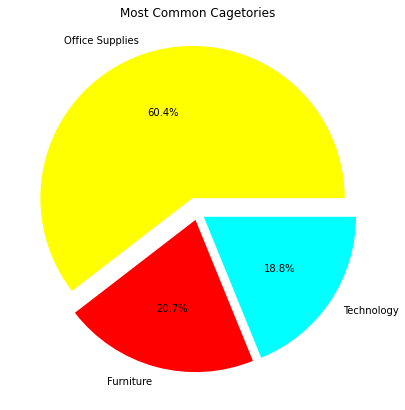

In [23]:
def draw_graph(label, colors, explode, sizes):
    plt.figure(figsize=(7, 7))
    plt.title('Most Common Cagetories')
    return plt.pie(sizes, labels=label, colors=colors, explode=explode, autopct='%1.1f%%')

labels = most_common_category['category']
colors = ['yellow', 'red', 'cyan']
explode = [0.1, 0.05, 0.05]
sizes = most_common_category['counts']

draw_graph(labels, colors, explode, sizes)

In [77]:
dataframe = pd.DataFrame(
    {'date': load_data.__getitem__()['Order Date'],
     'category': load_data.__getitem__()['Category'],
     'counts': load_data.__getitem__()['Sales']}
)

dataframe['date'] = pd.to_datetime(dataframe['date'])
date_df = dataframe[
    (dataframe['category'] == 'Furniture') &
    (dataframe['date'] >= '2020-01-01') &
    (dataframe['date'] <= '2020-01-30')
]
sum(date_df['counts'])

17590.714